In [18]:
#Read Board GAmes Data from csv file
import pandas as pd
games=pd.read_csv("games.csv")
games=games.dropna(axis=0)
games=games[games["users_rated"]>0]
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


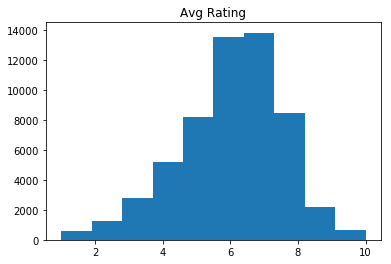

In [19]:
#Creating histogram for average rating column
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(games["average_rating"])
plt.title("Avg Rating")
plt.show()

In [20]:
print(games["average_rating"].std())
print(games["average_rating"].mean())

1.578829934833296
6.016112849333848


In [8]:

#Error metric

#In this data set, using mean squared error as an error metric makes sense. This is because the data is continuous, and follows a somewhat normal distribution. We'll be able to compare our error to the standard deviation to see how good the model is at predictions.


In [35]:
from sklearn.cluster import KMeans

clus = KMeans(n_clusters=5)
cols = list(games.columns)
cols.remove("name")
cols.remove("id")
cols.remove("type")
numeric = games[cols]
clus.fit(numeric)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
labels=clus.labels_

In [37]:
import numpy
game_mean = numeric.apply(numpy.mean, axis=1)
game_mean.head()
game_std = numeric.apply(numpy.std, axis=1)

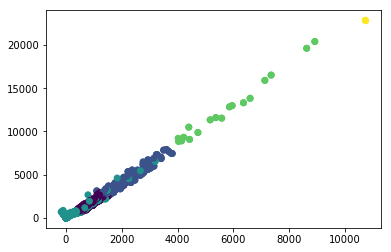

In [38]:
plt.scatter(game_mean,game_std,c=labels)
plt.show()

In [39]:
correlation=numeric.corr()
print(correlation["average_rating"])

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


In [65]:
# yearpublished is highly correlated; new games have high avg rating
#Games where minage is high is highly rated
#games with high avg weight is highly rated
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
cols = list(games.columns)
cols.remove("name")
cols.remove("id")
cols.remove("type")
cols.remove("average_rating")
cols.remove("bayes_average_rating")
lr.fit(games[cols], games["average_rating"])
predictions = lr.predict(games[cols])

numpy.mean((predictions - games["average_rating"]) ** 2)


2.093396975833936

In [69]:
score=lr.score(games[cols],games["average_rating"])
print(score*100)

16.0175535428
